# Práctico 5
1. Entrena y ajusta un árbol de decisión para el conjunto de datos moons siguiendo estos pasos:
  - Usa make_moons(n_samples=10000, noise=0.4) para generar el conjunto de datos moons.
  - Usa train_test_split() para dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
  - Usa la búsqueda en cuadrícula con validación cruzada (con la ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. Consejo: prueba varios valores para max_leaf_nodes.
  - Entrena el modelo en el conjunto de entrenamiento completo utilizando estos hiperparámetros y mide su rendimiento en el conjunto de prueba. Deberías obtener una precisión aproximada del 85% al 87%.
1. Cargar el dataset de iris. Tomando solamente las variables de largo y ancho del pétalo, entrenar los distintos modelos de Clasificación que se vieron en clase y comparar los bordes generadas para cada una de las Clases.
Modelos:
  - Regresión Softmax
  - Clasificador Estocástico (utilice 10000 iteraciones)
  - SVM lineal
  - SVM con kernel (pruebe diferentes kernels)
  - Naive Bayes
  - Decision Tree (utilice una profundidad máxima de 2)
  - KNeighbors (varie el número de vecinos a 3)
2. Construya un modelo de ensamble de votación con los modelos anteriores.
3. Cree una muestra unidimensional con *y* dependiendo cuadraticamente de *x*, entrenar los distintos modelos de regresión que se vieron en clase y comparar las aproximaciones graficandolas. ¿En caso de querer extrapolar, que modelos no parecen ser una buena elección?
Modelos:
  - Regresión Lineal
  - Regresión Polinomica
  - Regresión Lineal Estocástica
  - SVM lineal
  - SVM con kernel
  - Decision Tree
  - KNeighbors
4. Al igual que con los clasificadores, contruya un modelo de ensamble de votación, pero esta vez de regresión.

In [202]:
#Generar datos moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


#genero los datos 
X,y=make_moons(n_samples=1000, noise=0.1,random_state=42)
#display(data)

In [203]:
#1.2 uso train_test_split para dividir los datos en train y test

from sklearn.model_selection import train_test_split

#Data[0] son los datos de entrada o caracteristicas y data[1] son las etiquetas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [204]:
#1.3 busqueda de cuadricula para encontrar los mejores parametros con grid search para un decision tree classifier
#sa la búsqueda en cuadrícula con validación cruzada (con la ayuda de la clase GridSearchCV) para encontrar buenos valores de hiperparámetros para un DecisionTreeClassifier. 
# Consejo: prueba varios valores para max_leaf_nodes
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(random_state=42)


param_grid={ 'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4]}

#defino el buscador de cuadricula o una instancia de gridsearchcv
#el parametro verbose=1 muestra la cantidad de combinaciones de hiperparametros que se estan probando y el progreso de la busqueda
#el n_jobs=-1 indica que se usen todos los procesadores disponibles para la busqueda
grid_search=GridSearchCV(dt_clf, param_grid, cv=5, verbose=1, n_jobs=-1,scoring='accuracy')

#ajusto el grid search a los datos de entrenamiento
grid_search.fit(x_train, y_train)

#muestro los mejores parametros
print("Mejores parametros: ",grid_search.best_params_)
print("Mejor score: ",grid_search.best_score_)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Mejores parametros:  {'max_leaf_nodes': 10, 'min_samples_split': 2}
Mejor score:  0.99375


In [205]:
#1.4 entreno un decision tree classifier con los mejores parametros encontrados
#Calcular la prediccion de las etiquetas de test y la probabilidad de pertenecer a cada clase

#Re entrenamos el modelo con los mejores parametos
from sklearn.metrics import accuracy_score


best_dtree=DecisionTreeClassifier(max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],   
                                        min_samples_split=grid_search.best_params_['min_samples_split'],
                                        random_state=42)
#ajusto los datos de entrenamiento completo con los mejores hiperparametros
best_dtree.fit(x_train, y_train)

#realizo la prediccion de las etiquetas de test
y_pred = best_dtree.predict(x_test)

# Calcula la precisión en el conjunto de prueba
accuracy = best_dtree.score(x_test, y_test)
print("Precisión en el conjunto de prueba: {:.2f}%".format(accuracy * 100))



Precisión en el conjunto de prueba: 99.50%


## 1. Cargar el dataset de iris. Tomando solamente las variables de largo y ancho del pétalo, entrenar los distintos modelos de Clasificación que se vieron en clase y comparar los bordes generadas para cada una de las Clases.
Modelos:
  - Regresión Softmax
  - Clasificador Estocástico (utilice 10000 iteraciones)
  - SVM lineal
  - SVM con kernel (pruebe diferentes kernels)
  - Naive Bayes
  - Decision Tree (utilice una profundidad máxima de 2)
  - KNeighbors (varie el número de vecinos a 3)

In [206]:
#Cargar dataset irirs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

#cargo el dataset iris
iris=datasets.load_iris()

#Pide que solo tome las primeras dos caracteristicas que corresponden a la longitud y ancho del sepalo
X=iris.data[:, :2] 
y=iris.target


In [207]:
#Divido los datos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [208]:
#Defino los modelos
from sklearn.calibration import LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models = [
    ("Regresión Softmax", LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)),
    ("Clasificador Estocástico", SGDClassifier(max_iter=10000, random_state=42)),
    ("SVM lineal", SVC(kernel="linear", random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("SVM RBF", SVC(kernel="rbf", random_state=42)),
    ("Árbol de decisión", DecisionTreeClassifier(max_depth=2, random_state=42)),
    ("KNeighbors (k=3)", KNeighborsClassifier(n_neighbors=3))
]

In [209]:
#Defino funcion para crear un grafico que muestra los bordes de decision de un modelo de clasiiacion en un espacio de dos dimensiones
#largo y ancho del petalo
#por parametro recibe el modelo, los datos de entrenamiento y test y el titulo del grafico
def plot_decision_boundary(X, y, model, ax, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    ax.set_title(title)
    ax.set_xlabel('Petal length')
    ax.set_ylabel('Petal width')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)


Regresión Softmax - Precisión en el conjunto de prueba: 76.67%
Clasificador Estocástico - Precisión en el conjunto de prueba: 76.67%
SVM lineal - Precisión en el conjunto de prueba: 76.67%
Naive Bayes - Precisión en el conjunto de prueba: 73.33%
SVM RBF - Precisión en el conjunto de prueba: 76.67%
Árbol de decisión - Precisión en el conjunto de prueba: 73.33%
KNeighbors (k=3) - Precisión en el conjunto de prueba: 70.00%


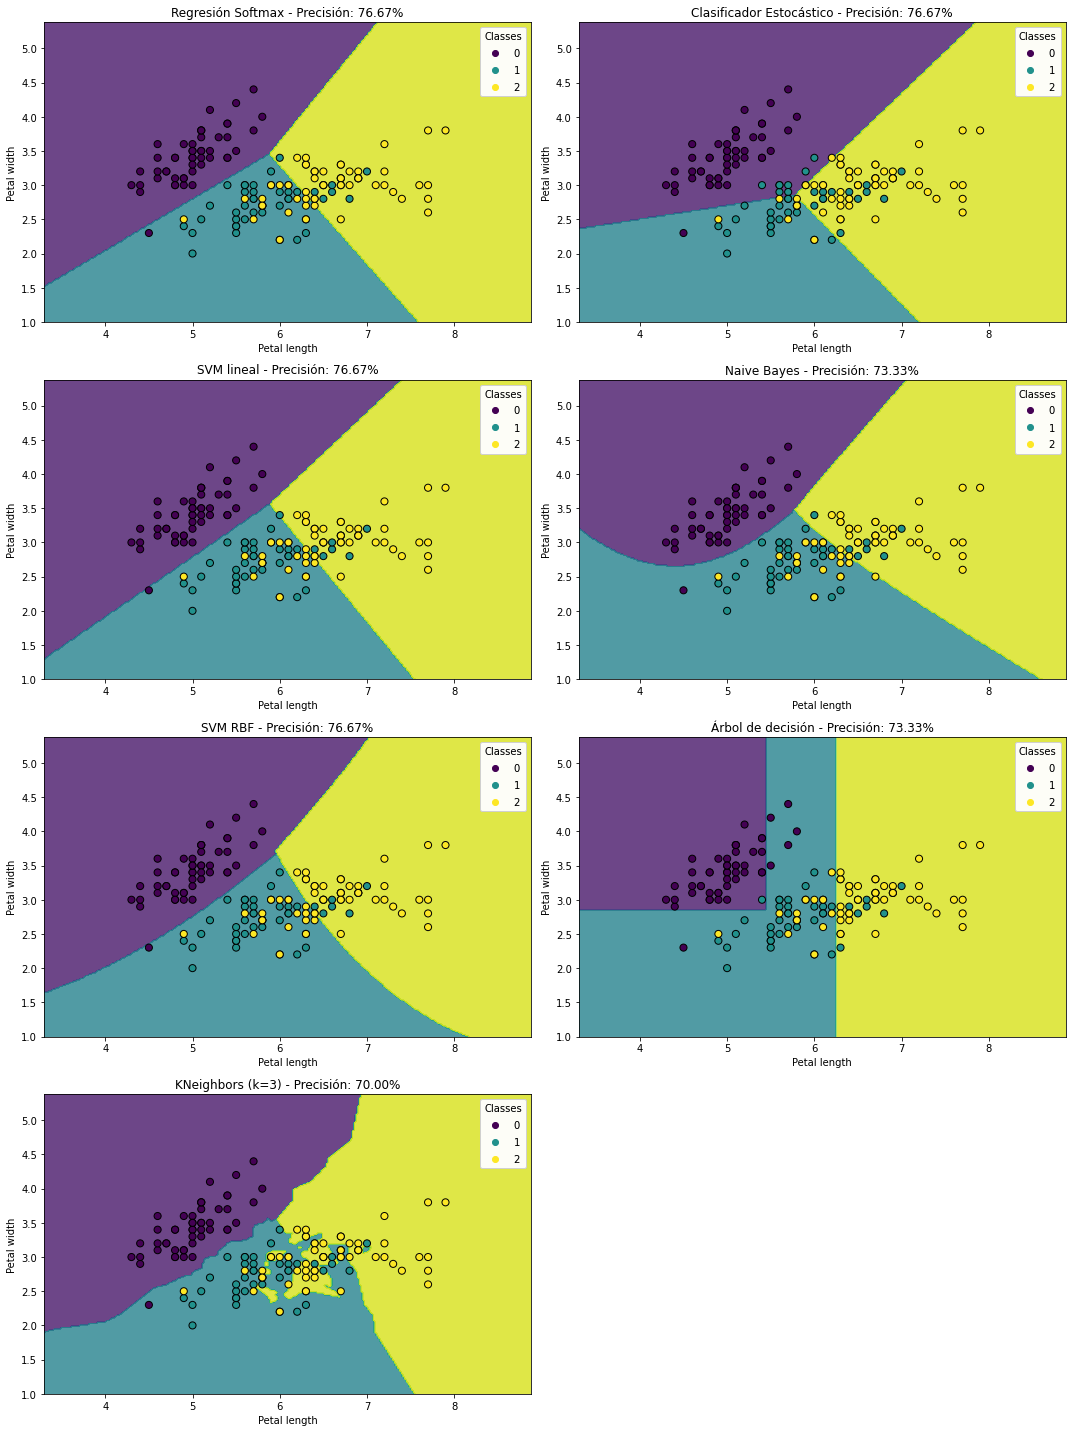

In [210]:
#Entreno y visualizo los diferentes modelos
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs = axs.ravel()

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
    plot_decision_boundary(X, y, model, axs[i], f"{name} - Precisión: {accuracy * 100:.2f}%")
    
# Eliminar gráficos vacíos
for i in range(len(models), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


## Descripcion de lo que muestra cada grafico
Cada gráfico muestra la distribución de los datos del conjunto de iris en un espacio bidimensional, utilizando el largo y ancho del pétalo como ejes. Cada punto en el gráfico representa una flor de iris, y el color de cada punto indica a qué clase pertenece (setosa, versicolor o virginica).

Los bordes de decisión son líneas o regiones en el gráfico que separan las diferentes clases. En otras palabras, el borde de decisión es la frontera en la que el modelo cambia su predicción de una clase a otra. Estos bordes son el resultado del entrenamiento del modelo en el conjunto de datos, y nos ayudan a visualizar cómo el modelo clasifica los datos en el espacio bidimensional.

Cuando un nuevo punto se encuentra en un área específica del gráfico, el modelo asignará ese punto a una clase en función de su posición con respecto a los bordes de decisión. Por ejemplo, si un punto está en el área verde, el modelo lo clasificará como perteneciente a la clase verde.

Al observar los gráficos y los bordes de decisión, podemos tener una idea de cómo cada modelo clasifica los datos y qué tan bien se ajusta a los datos de entrenamiento. Un buen modelo tendrá bordes de decisión que se ajusten bien a la distribución de los datos, minimizando las clasificaciones incorrectas.

Sin embargo, es importante mencionar que un modelo que se ajusta demasiado bien a los datos de entrenamiento puede sufrir de sobreajuste (overfitting), lo que significa que tendrá un rendimiento deficiente en datos nuevos y desconocidos. Por eso es crucial evaluar el rendimiento del modelo en un conjunto de datos de prueba independiente, como se hace en este código al calcular y mostrar la precisión del modelo en el conjunto de prueba.

## 2. Construya un modelo de ensamble de votación con los modelos anteriores.

In [211]:
from sklearn.ensemble import VotingClassifier
#Primero tengo que  crear y entrenar todos los modelos individualmente
# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos los modelos individuales
models = [
    ("Regresión Softmax", LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)),
    ("Clasificador Estocástico", SGDClassifier(max_iter=10000, random_state=42)),
    ("SVM lineal", SVC(kernel="linear", random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("SVM RBF", SVC(kernel="rbf", random_state=42)),
    ("Árbol de decisión", DecisionTreeClassifier(max_depth=2, random_state=42)),
    ("KNeighbors (k=3)", KNeighborsClassifier(n_neighbors=3))
]

#instancio el voting classifier
voting_clf=VotingClassifier(estimators=models,voting='hard')

#ajusto el voting classifier a los datos de entrenamiento
voting_clf.fit(X_train, y_train)

#Utilizando el conjunto de prueba, calcula la precisión del modelo
for clf in (models + [('Voting Classifier', voting_clf)]):
    clf[1].fit(X_train, y_train)
    y_pred = clf[1].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf[0]} - Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")
    #Vemos que el voting classifier tiene una mejor precision que la mayoria de los modelos individuales, salvo algunos que tienen una precision similar

Regresión Softmax - Precisión en el conjunto de prueba: 90.00%
Clasificador Estocástico - Precisión en el conjunto de prueba: 66.67%
SVM lineal - Precisión en el conjunto de prueba: 90.00%
Naive Bayes - Precisión en el conjunto de prueba: 90.00%
SVM RBF - Precisión en el conjunto de prueba: 90.00%
Árbol de decisión - Precisión en el conjunto de prueba: 80.00%
KNeighbors (k=3) - Precisión en el conjunto de prueba: 83.33%
Voting Classifier - Precisión en el conjunto de prueba: 90.00%


# Adicional
uso bagging y pasting

In [212]:
#implementacion de bagging y pasting

from sklearn.ensemble import BaggingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1)
bag_clf.fit(x_train,y_train)
y_pred=bag_clf.predict(X_test)
print("Precisión en el conjunto de prueba: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Precisión en el conjunto de prueba: 46.67%


In [213]:
#Evaluación Out-of-Bag: en
#Scikit-learn

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,oob_score=True)
bag_clf.fit(x_train,y_train)
bag_clf.oob_score_


#comparo con lo que obtengo en el conjunto de prueba
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
#Valor de la funcion de decision
bag_clf.oob_decision_function_



Precisión en el conjunto de prueba: 50.00%


array([[0.53440367, 0.07415902, 0.39143731],
       [0.03484848, 0.06022727, 0.90492424],
       [0.56246621, 0.26815866, 0.16937513],
       [0.44444444, 0.24413146, 0.3114241 ],
       [0.33316583, 0.51968174, 0.14715243],
       [0.0361991 , 0.35294118, 0.61085973],
       [0.40737052, 0.17828685, 0.41434263],
       [0.23589744, 0.06586538, 0.69823718],
       [0.55251142, 0.32739726, 0.12009132],
       [0.20362173, 0.65693047, 0.1394478 ],
       [0.39802956, 0.31461412, 0.28735632],
       [0.15765766, 0.27927928, 0.56306306],
       [0.17584098, 0.5970948 , 0.22706422],
       [0.16434109, 0.79705426, 0.03860465],
       [0.07537688, 0.16231156, 0.76231156],
       [0.6       , 0.16097561, 0.23902439],
       [0.07689394, 0.83219697, 0.09090909],
       [0.00151515, 0.41497835, 0.58350649],
       [0.44594595, 0.4463964 , 0.10765766],
       [0.49703704, 0.04444444, 0.45851852],
       [0.16419142, 0.04537954, 0.79042904],
       [0.6744391 , 0.3255609 , 0.        ],
       [0.

## 3. Cree una muestra unidimensional con *y* dependiendo cuadraticamente de *x*, entrenar los distintos modelos de regresión que se vieron en clase y comparar las aproximaciones graficandolas. ¿En caso de querer extrapolar, que modelos no parecen ser una buena elección?
Modelos:
  - Regresión Lineal
  - Regresión Polinomica
  - Regresión Lineal Estocástica
  - SVM lineal
  - SVM con kernel
  - Decision Tree
  - KNeighbors

  Una muestra unidimensional significa que tenemos solo una variable independiente (en este caso, x). La dependencia cuadrática de y con respecto a x significa que y es una función cuadrática de x, es decir, y = ax^2 + bx + c, donde a, b y c son coeficientes a determinar. En otras palabras, la relación entre x e y es una parábola.

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# Crear datos de muestra
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

# Entrenar modelos
models = [
    ("Regresión Lineal", LinearRegression()),
    ("Regresión Polinómica", LinearRegression()),
    ("Regresión Lineal Estocástica", SGDRegressor(random_state=42)),
    ("SVM lineal", LinearSVR(random_state=42)),
    ("SVM con kernel", SVR(kernel="rbf", gamma=1.0, C=1.0)),
    ("Árbol de decisión", DecisionTreeRegressor(random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=3))
]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


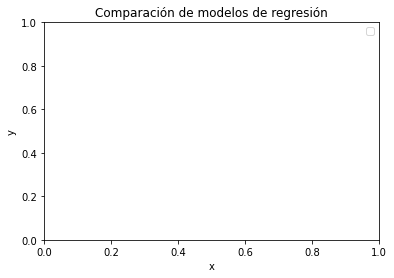

In [215]:
# Función para graficar las aproximaciones
def plot_regression(model, X, y, label):
    x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=label)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparación de modelos de regresión")
plt.show()

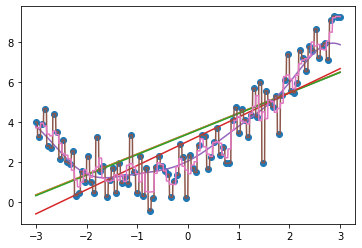

In [216]:

# Entrenar y graficar los modelos
plt.scatter(X, y, label="Muestra")
for name, model in models:
    model.fit(X, y.ravel())
    plot_regression(model, X, y, name)


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


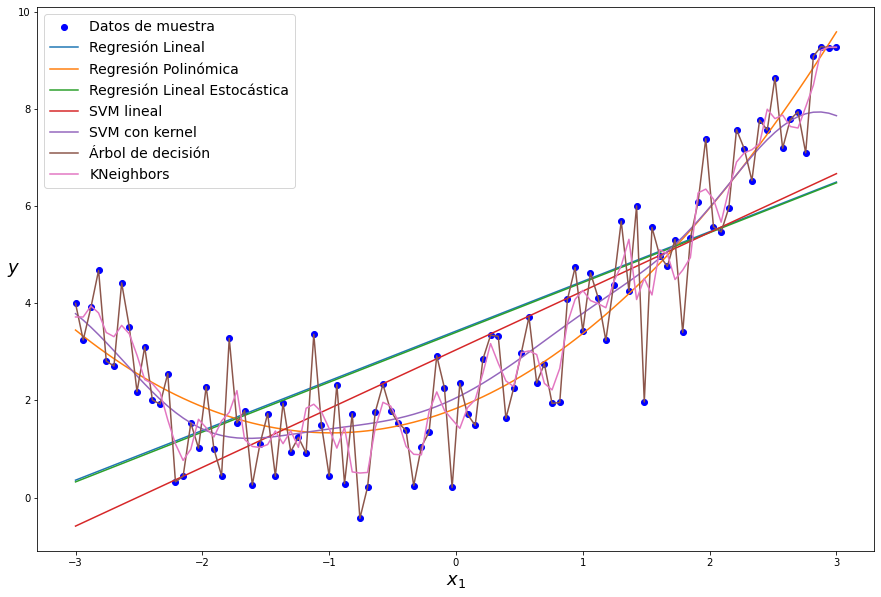

In [217]:
# Crear datos de muestra
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

# Entrenar modelos
models = [
    ("Regresión Lineal", LinearRegression()),
    ("Regresión Polinómica", LinearRegression()),
    ("Regresión Lineal Estocástica", SGDRegressor(random_state=42)),
    ("SVM lineal", LinearSVR(random_state=42)),
    ("SVM con kernel", SVR(kernel="rbf", gamma=1.0, C=1.0)),
    ("Árbol de decisión", DecisionTreeRegressor(random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=3))
]

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color="b", label="Datos de muestra")
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)

for name, model in models:
    if name == "Regresión Polinómica":
        poly_features = PolynomialFeatures(degree=2, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        model.fit(X_poly, y)
        X_new_poly = poly_features.transform(X_new)
        y_new = model.predict(X_new_poly)
    else:
        model.fit(X, y)
        y_new = model.predict(X_new)
        
    plt.plot(X_new, y_new, label=name)

plt.legend(loc="upper left", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Explicacion de la grafica
El gráfico muestra los datos de la muestra en azul, la verdadera función subyacente en rojo (en este caso, una función cuadrática) y las predicciones de los diferentes modelos de regresión en verde. Al comparar las diferentes aproximaciones verdes con la función verdadera en rojo, podemos evaluar qué modelos se ajustan mejor a los datos y qué modelos parecen estar sobreajustando o subajustando. Además, al tratar de extrapolar más allá de los datos de entrenamiento, podemos evaluar qué modelos parecen ser una buena elección y cuáles podrían no funcionar bien.

# Explciacion del codigo
Este código muestra cómo entrenar diferentes modelos de regresión (Regresión Lineal, Regresión Polinómica, Regresión Lineal Estocástica, SVM lineal, SVM con kernel, Árbol de decisión y KNeighbors) en una muestra unidimensional con y dependiendo cuadraticamente de x. El objetivo es comparar las aproximaciones de cada modelo y determinar cuáles serían una buena elección para extrapolar.

Extrapolar es hacer predicciones fuera del rango de valores de entrada de los datos utilizados para entrenar el modelo. Por ejemplo, si se tiene un modelo de regresión que se ha entrenado con datos en el rango de -10 a 10, hacer una predicción para un valor de entrada de 15 sería una extrapolación. Es importante tener en cuenta que los modelos de regresión están diseñados para hacer predicciones dentro del rango de los datos de entrenamiento y pueden no ser precisos en la extrapolación. Por lo tanto, es importante tener precaución al realizar predicciones fuera del rango de los datos de entrenamiento.

Primero, se crean datos de muestra a partir de una función cuadrática con ruido gaussiano. Luego, se entrena cada modelo en los datos de muestra y se generan predicciones para un conjunto de valores X_new que cubren un rango más amplio de valores que los datos de muestra. Finalmente, se grafican los datos de muestra junto con las aproximaciones de cada modelo.

## 4. Al igual que con los clasificadores, contruya un modelo de ensamble de votación, pero esta vez de regresión.

In [218]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Crear datos de muestra
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

# Crear conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ("Regresión Lineal", LinearRegression()),
    ("Regresión Polinómica", LinearRegression()),
    ("Regresión Lineal Estocástica", SGDRegressor(random_state=42)),
    ("SVM lineal", LinearSVR(random_state=42)),
    ("SVM con kernel", SVR(kernel="rbf", gamma=1.0, C=1.0)),
    ("Árbol de decisión", DecisionTreeRegressor(random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=3))
]   

# Crear modelo de ensamble de votación
voting_reg = VotingRegressor(estimators=models)

# Entrenar modelos y evaluar su rendimiento
for name, model in models + [("Ensamble de votación", voting_reg)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: MSE en el conjunto de prueba = {mse:.2f}")

    #Vemos que el voting classifier tiene una mejor precision que la mayoria de los modelos individuales, salvo algunos que tienen una precision similar

Regresión Lineal: MSE en el conjunto de prueba = 2.41
Regresión Polinómica: MSE en el conjunto de prueba = 2.41
Regresión Lineal Estocástica: MSE en el conjunto de prueba = 2.42
SVM lineal: MSE en el conjunto de prueba = 3.08
SVM con kernel: MSE en el conjunto de prueba = 0.64
Árbol de decisión: MSE en el conjunto de prueba = 1.40
KNeighbors: MSE en el conjunto de prueba = 0.81
Ensamble de votación: MSE en el conjunto de prueba = 1.21


/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/juan-pablo/.local/lib/python3.8/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

## diferencia entre regresion y clasificacion
La principal diferencia entre regresión y clasificación es el tipo de variable de respuesta que se está modelando. En la regresión, la variable de respuesta es una variable continua que se espera que tome valores en un rango continuo, mientras que en la clasificación, la variable de respuesta es una variable categórica que toma valores discretos. En otras palabras, la regresión se utiliza para predecir un valor numérico, mientras que la clasificación se utiliza para predecir una categoría o clase.

En el caso de la regresión, los modelos se ajustan para predecir una variable continua, como la predicción del precio de una casa en función de sus características. En la clasificación, los modelos se ajustan para predecir una variable categórica, como la clasificación de imágenes en diferentes categorías.

En cuanto a los modelos de ensamble de votación, tanto en regresión como en clasificación, se utilizan para combinar las predicciones de varios modelos en un solo modelo más robusto y preciso. La principal diferencia entre el modelo de ensamble de votación de regresión y el de clasificación es el tipo de modelo utilizado en cada caso y la variable de respuesta que se está prediciendo.

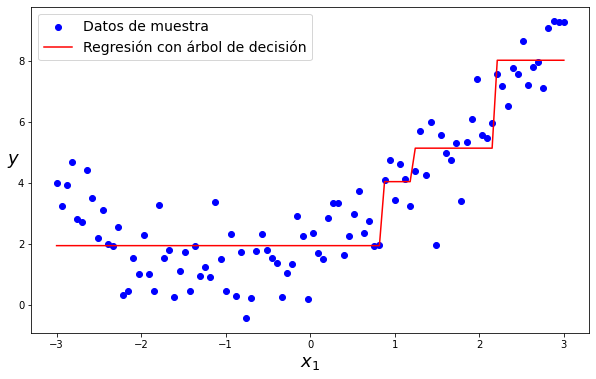

In [221]:
#Implementaion de regresion con decision tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Crear datos de muestra
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100, 1)

# Entrenar modelo
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Datos de muestra')
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
y_new = tree_reg.predict(X_new)
plt.plot(X_new, y_new, color='r', label='Regresión con árbol de decisión')
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.show()

In [219]:
### funcion para graficar 
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
def generate_iris_plot(clasifier):
  x0, x1 = np.meshgrid(
          np.linspace(0, 8, 500).reshape(-1, 1),
          np.linspace(0, 3.5, 200).reshape(-1, 1),
      )

  X_new = np.c_[x0.ravel(), x1.ravel()]

  y_predict = clasifier.predict(X_new)

  zz = y_predict.reshape(x0.shape)

  plt.figure(figsize=(10, 4))
  plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
  plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
  plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

  
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

  plt.contourf(x0, x1, zz, cmap=custom_cmap)
  plt.xlabel("Petal length", fontsize=14)
  plt.ylabel("Petal width", fontsize=14)
  plt.legend(loc="center left", fontsize=14)
  plt.axis([0, 8, 0, 3.5])

  plt.show()
  
  

# Preguntas teoricas
### Regresión
1. ¿Qué algoritmo de entrenamiento de Regresión Lineal puedes usar si tienes un conjunto de entrenamiento con millones de características?
2. Supongamos que las características en tu conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir por esto y cómo? ¿Qué puedes hacer al respecto?
3. ¿Puede el Descenso de Gradiente quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística?
4. ¿Todos los algoritmos de Descenso de Gradiente conducen al mismo modelo, siempre y cuando los dejes correr el tiempo suficiente?
5. Supongamos que usas Descenso de Gradiente por lotes y graficas el error de validación en cada época. Si notas que el error de validación consistentemente aumenta, ¿qué es lo que probablemente está sucediendo? ¿Cómo puedes solucionarlo?
6. ¿Es una buena idea detener inmediatamente el Descenso de Gradiente por mini-lotes cuando el error de validación aumenta?
7. ¿Qué algoritmo de Descenso de Gradiente (entre los que discutimos) llegará más rápido a la cercanía de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?
8. Supongamos que estás utilizando Regresión Polinómica. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el error de validación. ¿Qué está sucediendo? ¿Cuáles son tres formas de solucionarlo?
9. Supongamos que estás utilizando Regresión Ridge y notas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Dirías que el modelo sufre de sesgo alto o de varianza alta? ¿Deberías aumentar el hiperparámetro de regularización α o reducirlo?
10. ¿Por qué querrías usar:
  - Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin regularización)?
  - Lasso en lugar de Regresión Ridge?
  - Elastic Net en lugar de Lasso?
11. Supongamos que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de Regresión Logística o uno de Regresión Softmax?
### SVM
1. ¿Cuál es la idea fundamental detrás de las Máquinas de Vectores de Soporte?
2. ¿Qué es un vector de soporte?
3. ¿Por qué es importante escalar las entradas al usar SVM?
4. ¿Puede un clasificador SVM producir un puntaje de confianza al clasificar una instancia? ¿Y una probabilidad?
5. ¿Deberías usar la forma primal o dual del problema SVM para entrenar un modelo en un conjunto de entrenamiento con millones de instancias y cientos de características?
6. Digamos que has entrenado un clasificador SVM con un kernel RBF, pero parece subajustarse al conjunto de entrenamiento. ¿Deberías aumentar o disminuir γ (gamma)? ¿Y C?
### Árboles de decisiones
1. ¿Cuál es la profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias?
2. ¿La impureza de Gini de un nodo es generalmente menor o mayor que la de su padre? ¿Es generalmente menor/mayor o siempre menor/mayor?
3. Si un árbol de decisión está sobreajustando el conjunto de entrenamiento, ¿es buena idea intentar disminuir max_depth?
4. Si un árbol de decisión está subajustando el conjunto de entrenamiento, ¿es buena idea intentar escalar las características de entrada?
5. Si tarda una hora en entrenar un árbol de decisión en un conjunto de entrenamiento que contiene 1 millón de instancias, ¿cuánto tiempo aproximado tomará entrenar otro árbol de decisión en un conjunto de entrenamiento que contiene 10 millones de instancias?
6. Si su conjunto de entrenamiento contiene 100,000 instancias, ¿establecer presort=True acelerará el entrenamiento?

# Preguntas teoricas
### Regresión
1. ¿Qué algoritmo de entrenamiento de Regresión Lineal puedes usar si tienes un conjunto de entrenamiento con millones de características?
2. Supongamos que las características en tu conjunto de entrenamiento tienen escalas muy diferentes. ¿Qué algoritmos podrían sufrir por esto y cómo? ¿Qué puedes hacer al respecto?
3. ¿Puede el Descenso de Gradiente quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística?
4. ¿Todos los algoritmos de Descenso de Gradiente conducen al mismo modelo, siempre y cuando los dejes correr el tiempo suficiente?
5. Supongamos que usas Descenso de Gradiente por lotes y graficas el error de validación en cada época. Si notas que el error de validación consistentemente aumenta, ¿qué es lo que probablemente está sucediendo? ¿Cómo puedes solucionarlo?
6. ¿Es una buena idea detener inmediatamente el Descenso de Gradiente por mini-lotes cuando el error de validación aumenta?
7. ¿Qué algoritmo de Descenso de Gradiente (entre los que discutimos) llegará más rápido a la cercanía de la solución óptima? ¿Cuál convergerá realmente? ¿Cómo puedes hacer que los demás también converjan?
8. Supongamos que estás utilizando Regresión Polinómica. Graficas las curvas de aprendizaje y notas que hay una gran brecha entre el error de entrenamiento y el error de validación. ¿Qué está sucediendo? ¿Cuáles son tres formas de solucionarlo?
9. Supongamos que estás utilizando Regresión Ridge y notas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Dirías que el modelo sufre de sesgo alto o de varianza alta? ¿Deberías aumentar el hiperparámetro de regularización α o reducirlo?
10. ¿Por qué querrías usar:
  - Regresión Ridge en lugar de Regresión Lineal simple (es decir, sin regularización)?
  - Lasso en lugar de Regresión Ridge?
  - Elastic Net en lugar de Lasso?
11. Supongamos que quieres clasificar imágenes como exteriores/interiores y diurnas/nocturnas. ¿Deberías implementar dos clasificadores de Regresión Logística o uno de Regresión Softmax?

    1-Para conjuntos de entrenamiento con millones de características se pueden utilizar algoritmos de Regresión Lineal como el Gradiente Estocástico (SGD), el cual actualiza los pesos de manera incremental en cada instancia de entrenamiento, lo que permite trabajar con grandes conjuntos de datos.

    2-Los algoritmos que podrían sufrir por la diferencia de escalas entre las características son aquellos que se basan en la distancia euclidiana, como el SVM o K-NN. Una solución es escalar las características antes de entrenar el modelo, por ejemplo utilizando la estandarización o normalización.

    3-Sí, el Descenso de Gradiente puede quedar atrapado en un mínimo local al entrenar un modelo de Regresión Logística. Sin embargo, en la práctica esto ocurre con poca frecuencia debido a que la función de coste suele ser convexa.

    4-No, debido a que los algoritmos de Descenso de Gradiente pueden quedar atrapados en mínimos locales o en mesetas. Incluso cuando se utiliza Descenso de Gradiente Estocástico, los resultados pueden ser diferentes debido a la aleatoriedad inherente del proceso.

    5-Si el error de validación aumenta consistentemente, es probable que el modelo esté sobreajustando los datos de entrenamiento. Para solucionarlo, se pueden utilizar técnicas de regularización como la reducción del número de características, la eliminación de características irrelevantes o la utilización de técnicas como Ridge, Lasso o Elastic Net.

    6-No necesariamente, ya que puede tratarse de una fluctuación aleatoria. Sin embargo, si el error de validación sigue aumentando después de varias épocas, es posible que el modelo esté sobreajustando los datos de entrenamiento y se deben tomar medidas para solucionarlo.

    7-El Descenso de Gradiente Estocástico suele llegar más rápido a la cercanía de la solución óptima debido a que actualiza los pesos de manera más frecuente. Sin embargo, el Descenso de Gradiente por lotes converge de manera más consistente. Para hacer que los demás también converjan, se pueden utilizar técnicas como el enfriamiento de la tasa de aprendizaje o el uso de un optimizador como Adam.

    8-Si hay una gran brecha entre el error de entrenamiento y el error de validación en Regresión Polinómica, es probable que el modelo esté sobreajustando los datos de entrenamiento. Para solucionarlo se pueden utilizar técnicas de regularización como Ridge, Lasso o Elastic Net, o reducir el grado del polinomio utilizado para el modelo.

    9-Si el error de entrenamiento y el error de validación son casi iguales y bastante altos en Regresión Ridge, se dice que el modelo sufre de sesgo alto. En este caso, se puede probar reducir el valor de α para permitir un ajuste más flexible del modelo.

    10-Se utilizaría Regresión Ridge en lugar de Regresión Lineal simple para reducir la varianza del modelo y evitar el sobreajuste. Se utilizaría Lasso en lugar de Regresión Ridge cuando se desea realizar selección de características y eliminar aquellas que no contribuyen significativamente al modelo. Se utilizaría Elastic Net en lugar de Lasso cuando se desea equilibrar la selección de características y la regularización L1 y L2.

    11-Se debería utilizar un clasificador de Regresión Softmax, ya que permite clasificar

### SVM
1. ¿Cuál es la idea fundamental detrás de las Máquinas de Vectores de Soporte?
2. ¿Qué es un vector de soporte?
3. ¿Por qué es importante escalar las entradas al usar SVM?
4. ¿Puede un clasificador SVM producir un puntaje de confianza al clasificar una instancia? ¿Y una probabilidad?
5. ¿Deberías usar la forma primal o dual del problema SVM para entrenar un modelo en un conjunto de entrenamiento con millones de instancias y cientos de características?
6. Digamos que has entrenado un clasificador SVM con un kernel RBF, pero parece subajustarse al conjunto de entrenamiento. ¿Deberías aumentar o disminuir γ (gamma)? ¿Y C?

    1- La idea fundamental detrás de las Máquinas de Vectores de Soporte (SVM) es encontrar un hiperplano que separe de manera óptima las diferentes clases en un espacio de características de alta dimensión. SVM busca el hiperplano que maximiza la distancia entre las muestras más cercanas de las clases, también conocidas como vectores de soporte, lo que hace que la clasificación sea más robusta y generalizable.

    2- Un vector de soporte es una muestra de entrenamiento que se encuentra en o cerca del borde de la región de decisión entre dos clases. Estos puntos son importantes para SVM, ya que determinan la posición y la orientación del hiperplano que separa las clases.

    3- Es importante escalar las entradas al usar SVM porque SVM busca el hiperplano que maximiza la distancia entre los vectores de soporte de las diferentes clases. Si las características no están en la misma escala, entonces algunas características pueden dominar sobre otras, lo que afectará la distancia entre los vectores de soporte y, por lo tanto, la ubicación del hiperplano.

    4- Sí, un clasificador SVM puede producir un puntaje de confianza al clasificar una instancia. El puntaje de confianza se calcula como la distancia de la instancia al hiperplano de decisión. Sin embargo, SVM no produce una probabilidad directamente. Para obtener una probabilidad, se debe usar la función de decisión del clasificador SVM y aplicar una función sigmoidea o softmax para obtener una estimación de probabilidad.

    5- En general, se recomienda utilizar la forma dual del problema SVM cuando el número de características es mayor que el número de muestras. Sin embargo, para conjuntos de datos con millones de instancias y cientos de características, la forma primal puede ser más adecuada debido a su eficiencia computacional.

    6- Si el clasificador SVM parece subajustarse al conjunto de entrenamiento, es necesario ajustar los hiperparámetros para mejorar su desempeño. Si se utiliza un kernel RBF, se puede aumentar γ para hacer que la función del kernel sea más sensible a las muestras cercanas y, por lo tanto, más flexible. Por otro lado, si el modelo tiene un sesgo alto, es decir, está subajustando los datos, se puede disminuir C para permitir que el modelo tenga más errores en la función de pérdida y, por lo tanto, sea menos rígido en la clasificación de las muestras.

### Árboles de decisiones
1. ¿Cuál es la profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias?
2. ¿La impureza de Gini de un nodo es generalmente menor o mayor que la de su padre? ¿Es generalmente menor/mayor o siempre menor/mayor?
3. Si un árbol de decisión está sobreajustando el conjunto de entrenamiento, ¿es buena idea intentar disminuir max_depth?
4. Si un árbol de decisión está subajustando el conjunto de entrenamiento, ¿es buena idea intentar escalar las características de entrada?
5. Si tarda una hora en entrenar un árbol de decisión en un conjunto de entrenamiento que contiene 1 millón de instancias, ¿cuánto tiempo aproximado tomará entrenar otro árbol de decisión en un conjunto de entrenamiento que contiene 10 millones de instancias?
6. Si su conjunto de entrenamiento contiene 100,000 instancias, ¿establecer presort=True acelerará el entrenamiento?

    1-La profundidad aproximada de un árbol de decisión entrenado (sin restricciones) en un conjunto de entrenamiento con un millón de instancias puede ser muy grande, incluso mayor que el número de instancias. Sin embargo, la profundidad real dependerá de la complejidad del problema y de la cantidad y calidad de las características.
    2-La impureza de Gini de un nodo es generalmente menor que la de su padre, ya que los nodos secundarios suelen estar más especializados y tienen menos variedad que el nodo padre. Sin embargo, esto no es siempre cierto, ya que la impureza de Gini también puede aumentar en algunos casos.
    3-Sí, disminuir max_depth es una buena idea para evitar el sobreajuste del conjunto de entrenamiento en un árbol de decisión.
    4-No necesariamente. Escalar las características de entrada puede ayudar a algunos algoritmos de aprendizaje automático, pero en el caso de árboles de decisión, esto no es necesario ya que la escala no afecta la separación de los datos por los nodos.
    5-No hay una respuesta precisa a esta pregunta ya que el tiempo de entrenamiento depende de muchos factores, incluyendo la complejidad del problema, la cantidad de características y la potencia de procesamiento del hardware utilizado. Sin embargo, se puede esperar que el entrenamiento de un árbol de decisión en un conjunto de entrenamiento 10 veces más grande que el original tarde al menos 10 veces más, posiblemente más debido a la complejidad adicional.
    6-Establecer presort=True puede acelerar el entrenamiento de un árbol de decisión en algunos casos, pero también puede ralentizar el entrenamiento en otros casos, especialmente cuando el conjunto de entrenamiento es grande. Por lo tanto, es importante probar diferentes configuraciones y ajustarlas según sea necesario.



Gini es una medida de impureza utilizada en los árboles de decisión para determinar la homogeneidad de un conjunto de datos en términos de su distribución de clases. La impureza de Gini se refiere a la probabilidad de que una muestra aleatoria seleccionada al azar esté etiquetada incorrectamente, si se etiqueta de acuerdo con la distribución de clases en un nodo en particular. La impureza de Gini se calcula como la suma de los cuadrados de las probabilidades de cada clase en el nodo, multiplicado por el complemento de las mismas. Un nodo con impureza de Gini cero significa que todas las muestras en ese nodo pertenecen a la misma clase, mientras que un nodo con impureza de Gini máxima (1.0) significa que las muestras se distribuyen uniformemente entre todas las clases. En resumen, Gini es una medida que indica qué tan homogéneo es un conjunto de datos en términos de su distribución de clases.